<a href="https://colab.research.google.com/github/mani2106/Blog-Posts/blob/master/_notebooks/d2lai_part4.ipynbd2lai_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Calculus - d2l.ai Exercises - Part 4"
> "The fourth notebook in a series to be posted aiming to solve and understand exercises from d2l.ai curriculum on deep learning"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [d2l.ai-exercises, deep-learning, tensorflow]
- hide: false

## Required Imports

In [ ]:
#collapse
!pip install d2l

In [ ]:
#collapse_show
%matplotlib inline
import numpy as np
from IPython import display
from d2l import tensorflow as d2l

## Setup for plotting

In [ ]:
#collapse
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

## Question 1: Plot the function  $y=f(x)=x^3−(1/x)$  and its tangent line when  $x=1$.

The derivative of $f(x)$ here is $f'(x) = 3x^2 + 1/x^2$ and by setting $x=1$, we get `4`, let's try to simulate like they did.

In [ ]:
def f(x):
    return x**3 - (x ** -1)

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [ ]:
#collapse-output
h = 0.1
for i in range(10):
    print(f'h={h:.10f}, numerical limit={numerical_lim(f, 1, h):.10f}')
    h *= 0.1

h=0.1000000000, numerical limit=4.2190909091
h=0.0100000000, numerical limit=4.0201990099
h=0.0010000000, numerical limit=4.0020019990
h=0.0001000000, numerical limit=4.0002000200
h=0.0000100000, numerical limit=4.0000200002
h=0.0000010000, numerical limit=4.0000019997
h=0.0000001000, numerical limit=4.0000002022
h=0.0000000100, numerical limit=3.9999999868
h=0.0000000010, numerical limit=4.0000003310
h=0.0000000001, numerical limit=4.0000003310


We do see that the value approaches to `4`. So $y=4$ when $x=1$, to find the equation of the tangent line to $x^3−(1/x)$ at $x=1$

We already have the slope of the tangent line by substituting $x=1$ on $f'(x)$ which is $4$, since a tangent line shares atleast one point with the original equation($f(x)$), substituting the $x$ in $f(x)$ we get $0$.

So the common(shared) point between $f(x)$ and its tangent at $x=1$ is $(1,0)$, we can use the slope $4$ and the point $(1,0)$ to find the equation of the tangent line at $x=1$ with the formula:


$$y - y_1 = m(x-x_1)$$

where the $m$ is the slope and $x_1$ and $y_1$ are coordinates from the point which we found. Plugging in the values which we have into the equation we get the equation

$$ y = 4x - 4 $$

[This](https://gato-docs.its.txstate.edu/slac/Subject/Math/Calculus/Findting-the-Equation-of-a-Tangent-Line/Finding#:~:text=1%20Find%20the%20first%20derivative,equation%20for%20the%20tangent%20line.) is a good reference for another example of this method.

Let's see if it is the tangent line by visualising it

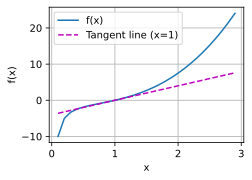

In [ ]:
x = np.arange(0.1, 3, 0.1)
plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Question 2: Find the gradient of the function $f(x) = 3x_1^2 + 5e^{x_2}$

For gradient we need to calculate the partial derivatives of the function given with respect to its variables. (ie)  $\frac{\partial y}{\partial x_1}$ and $\frac{\partial y}{\partial x_2}$

$$\frac{\partial y}{\partial x_1} = 6x_1 $$

$$\frac{\partial y}{\partial x_2} = 5e^{x_2}$$

so the gradient will be $$\nabla_xf(x) = [6x_1, 5e^{x_2}]$$

## Question 3: Find the gradient of $f(x) = ∥x∥_2$.

For this function, it can be split into $\sqrt{x^Tx}$. <br>
Let's consider $u = x^Tx$
then our function would become $f(x) = \sqrt{u} $ or $u^{1/2}$

So now we have two variables $u$ and $x$, the gradient of the function would be<br><br>
$$\frac{\partial y} {\partial u} . \frac{\partial y} {\partial x}$$
<br>
$$\frac{\partial y} {\partial u} = (1/2)*(u)^{-1/2} = \frac{1}{2 \sqrt u} = \frac{1}{2 ||x||_2}$$
<br>
$$\frac{\partial y} {\partial x} = \frac {\partial x^Tx} {\partial x} = 2x$$
<br>
$$\nabla_xf(x) = \frac{\partial y} {\partial u} . \frac{\partial y} {\partial x}$$<br>

$$ = \frac{1}{2 ||x||_2} . 2x = \frac {x}{||x||_2}$$

## Question 4: Can you write out the chain rule for the case where  $u=f(x,y,z)$ and $x=x(a,b) ,  y=y(a,b)$ and $z=z(a,b) $?

We need to treat $u$ as a function with variables $x$, $y$ and $z$ and each of $x,y,z$ as functions with variables $a$ and $b$

so by applying chain rule we get

$$ \frac{\partial u}{\partial a} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial a}+\frac{\partial u}{\partial y}\frac{\partial y}{\partial a}+\frac{\partial u}{\partial z}\frac{\partial z}{\partial a}$$
<br>
$$ \frac{\partial u}{\partial a} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial b} + \frac{\partial u}{\partial y}\frac{\partial y}{\partial b}+\frac{\partial u}{\partial z}\frac{\partial z}{\partial b}$$